In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

import tensorflow.compat.v1.keras.backend as K 
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import keras
import missingno as msno

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split

from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras
from keras.layers import Dropout
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#As the dataset has around 19 lakhs records,we are taking only 10% of records with sampling process.
df_m=pd.read_csv("AI_Ready_DMSP_Data.csv")
df=df_m.sample(frac=0.1, replace=False, random_state=1)
df.to_csv("df_10.csv",index=False)
df.shape

In [3]:
df=pd.read_csv("df_10.csv")
df.shape

(194589, 154)

In [4]:
#Change the column names to lower case
df.columns= df.columns.str.strip().str.lower()
#Extracting year and month from Datetimes column
df['year'] = pd.DatetimeIndex(df['datetimes']).year
#Converting the float values to 4 decimal values
df=df.iloc[:,1:].round(decimals=4)
target =df['ele_total_energy_flux']
df.head(5)

,sc_aacgm_lat,sc_aacgm_ltime,ele_total_energy_flux,ele_total_energy_flux_std,ele_avg_energy,ele_avg_energy_std,id_sc,sin_ut,cos_ut,sin_doy,...,al_5min,au_5min,symh_5min,pc_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min,year
0,72.7677,10.2291,7.765002e+10,0.1380,2499.3810,0.1667,15.0,-0.9222,-0.3867,-0.0688,...,-251.0,37.0,-3.0,1.93,405.9,-405.3,2.11,30388.3558,4745.5664,2003
1,85.0485,20.4707,9.803722e+07,0.6788,45.1855,0.7449,18.0,-0.5373,0.8434,0.6871,...,-9.0,13.0,3.0,0.13,322.4,-321.3,1.78,1906.4322,49.3308,2011
2,78.2499,13.6303,3.004856e+09,0.3134,537.3898,0.3388,16.0,0.4187,-0.9081,0.9899,...,-23.0,16.0,7.0,0.13,291.2,-291.1,1.08,17412.9252,2767.6507,2010
3,74.2052,12.6749,1.291172e+10,0.2651,2430.4100,0.3001,16.0,0.5556,0.8315,0.4405,...,-87.0,109.0,-1.0,1.41,336.8,-336.4,1.52,31219.7859,4440.2789,2014
4,74.8046,13.6776,6.944501e+09,0.1437,36.4695,0.2172,13.0,0.7880,0.6157,0.3213,...,-27.0,37.0,-6.0,0.33,454.8,-453.7,1.67,7278.7053,576.2518,2006


In [ ]:
df.describe()

,sc_aacgm_lat,sc_aacgm_ltime,ele_total_energy_flux,ele_total_energy_flux_std,ele_avg_energy,ele_avg_energy_std,id_sc,sin_ut,cos_ut,sin_doy,...,al_5min,au_5min,symh_5min,pc_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min,year
count,194589.000000,194589.000000,1.945890e+05,194589.000000,194589.000000,194589.000000,194589.000000,194589.000000,194589.000000,194589.000000,...,194589.000000,194589.000000,194589.000000,194589.000000,194589.000000,194589.000000,194589.000000,194589.000000,194589.000000,194589.000000
mean,65.696784,12.169738,3.119309e+11,0.380841,678.097925,0.521510,15.255374,-0.013764,0.001176,-0.058596,...,-67.590907,48.553325,-7.554004,0.564290,414.831226,-413.740782,1.713781,18303.434300,2584.558775,2007.302895
std,11.105043,6.186127,4.979141e+13,0.384536,1648.332898,0.528117,1.861353,0.704807,0.709265,0.686142,...,81.891565,44.224760,12.398762,0.924261,86.392135,86.169805,1.143188,15711.017309,2211.111638,4.290531
min,45.000700,0.000500,2.632692e+06,0.060200,30.000000,0.063600,6.000000,-1.000000,-1.000000,-1.000000,...,-1014.000000,-29.000000,-135.000000,-8.120000,235.000000,-894.800000,0.020000,0.000000,0.000000,1987.000000
25%,56.408900,7.017500,1.694379e+08,0.150100,46.713100,0.198900,13.000000,-0.713300,-0.710200,-0.717700,...,-89.000000,18.000000,-14.000000,0.010000,351.600000,-458.500000,1.030000,6111.045500,639.094900,2004.000000
50%,66.850400,10.587600,5.580742e+08,0.259900,94.646300,0.360400,15.000000,-0.026200,0.004400,-0.111700,...,-34.000000,34.000000,-7.000000,0.410000,400.400000,-399.400000,1.440000,14853.056100,2092.239300,2006.000000
75%,74.530000,17.949400,1.304408e+10,0.452700,433.216400,0.624200,17.000000,0.688400,0.713300,0.622000,...,-16.000000,64.000000,0.000000,1.050000,459.700000,-350.600000,2.070000,26383.871500,4087.456300,2011.000000
max,89.888600,23.999700,1.509848e+16,8.190500,30000.000000,11.404400,18.000000,1.000000,1.000000,1.000000,...,26.000000,467.000000,92.000000,10.350000,903.300000,-233.600000,26.550000,99977.376200,8999.589800,2014.000000


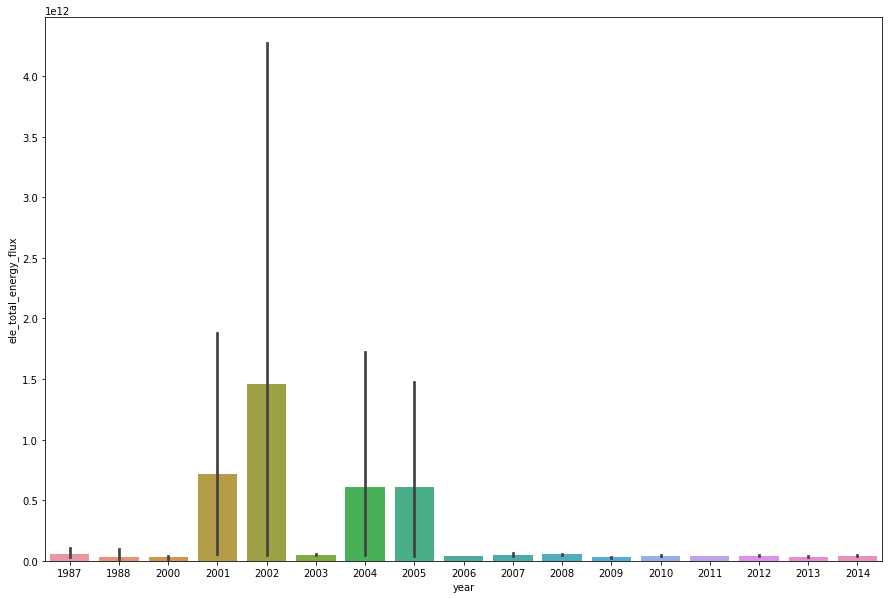

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='year',y=target)

Observation: year 2002 recorded highest ele_total_energy_flux

Finding Missing values in the dataset

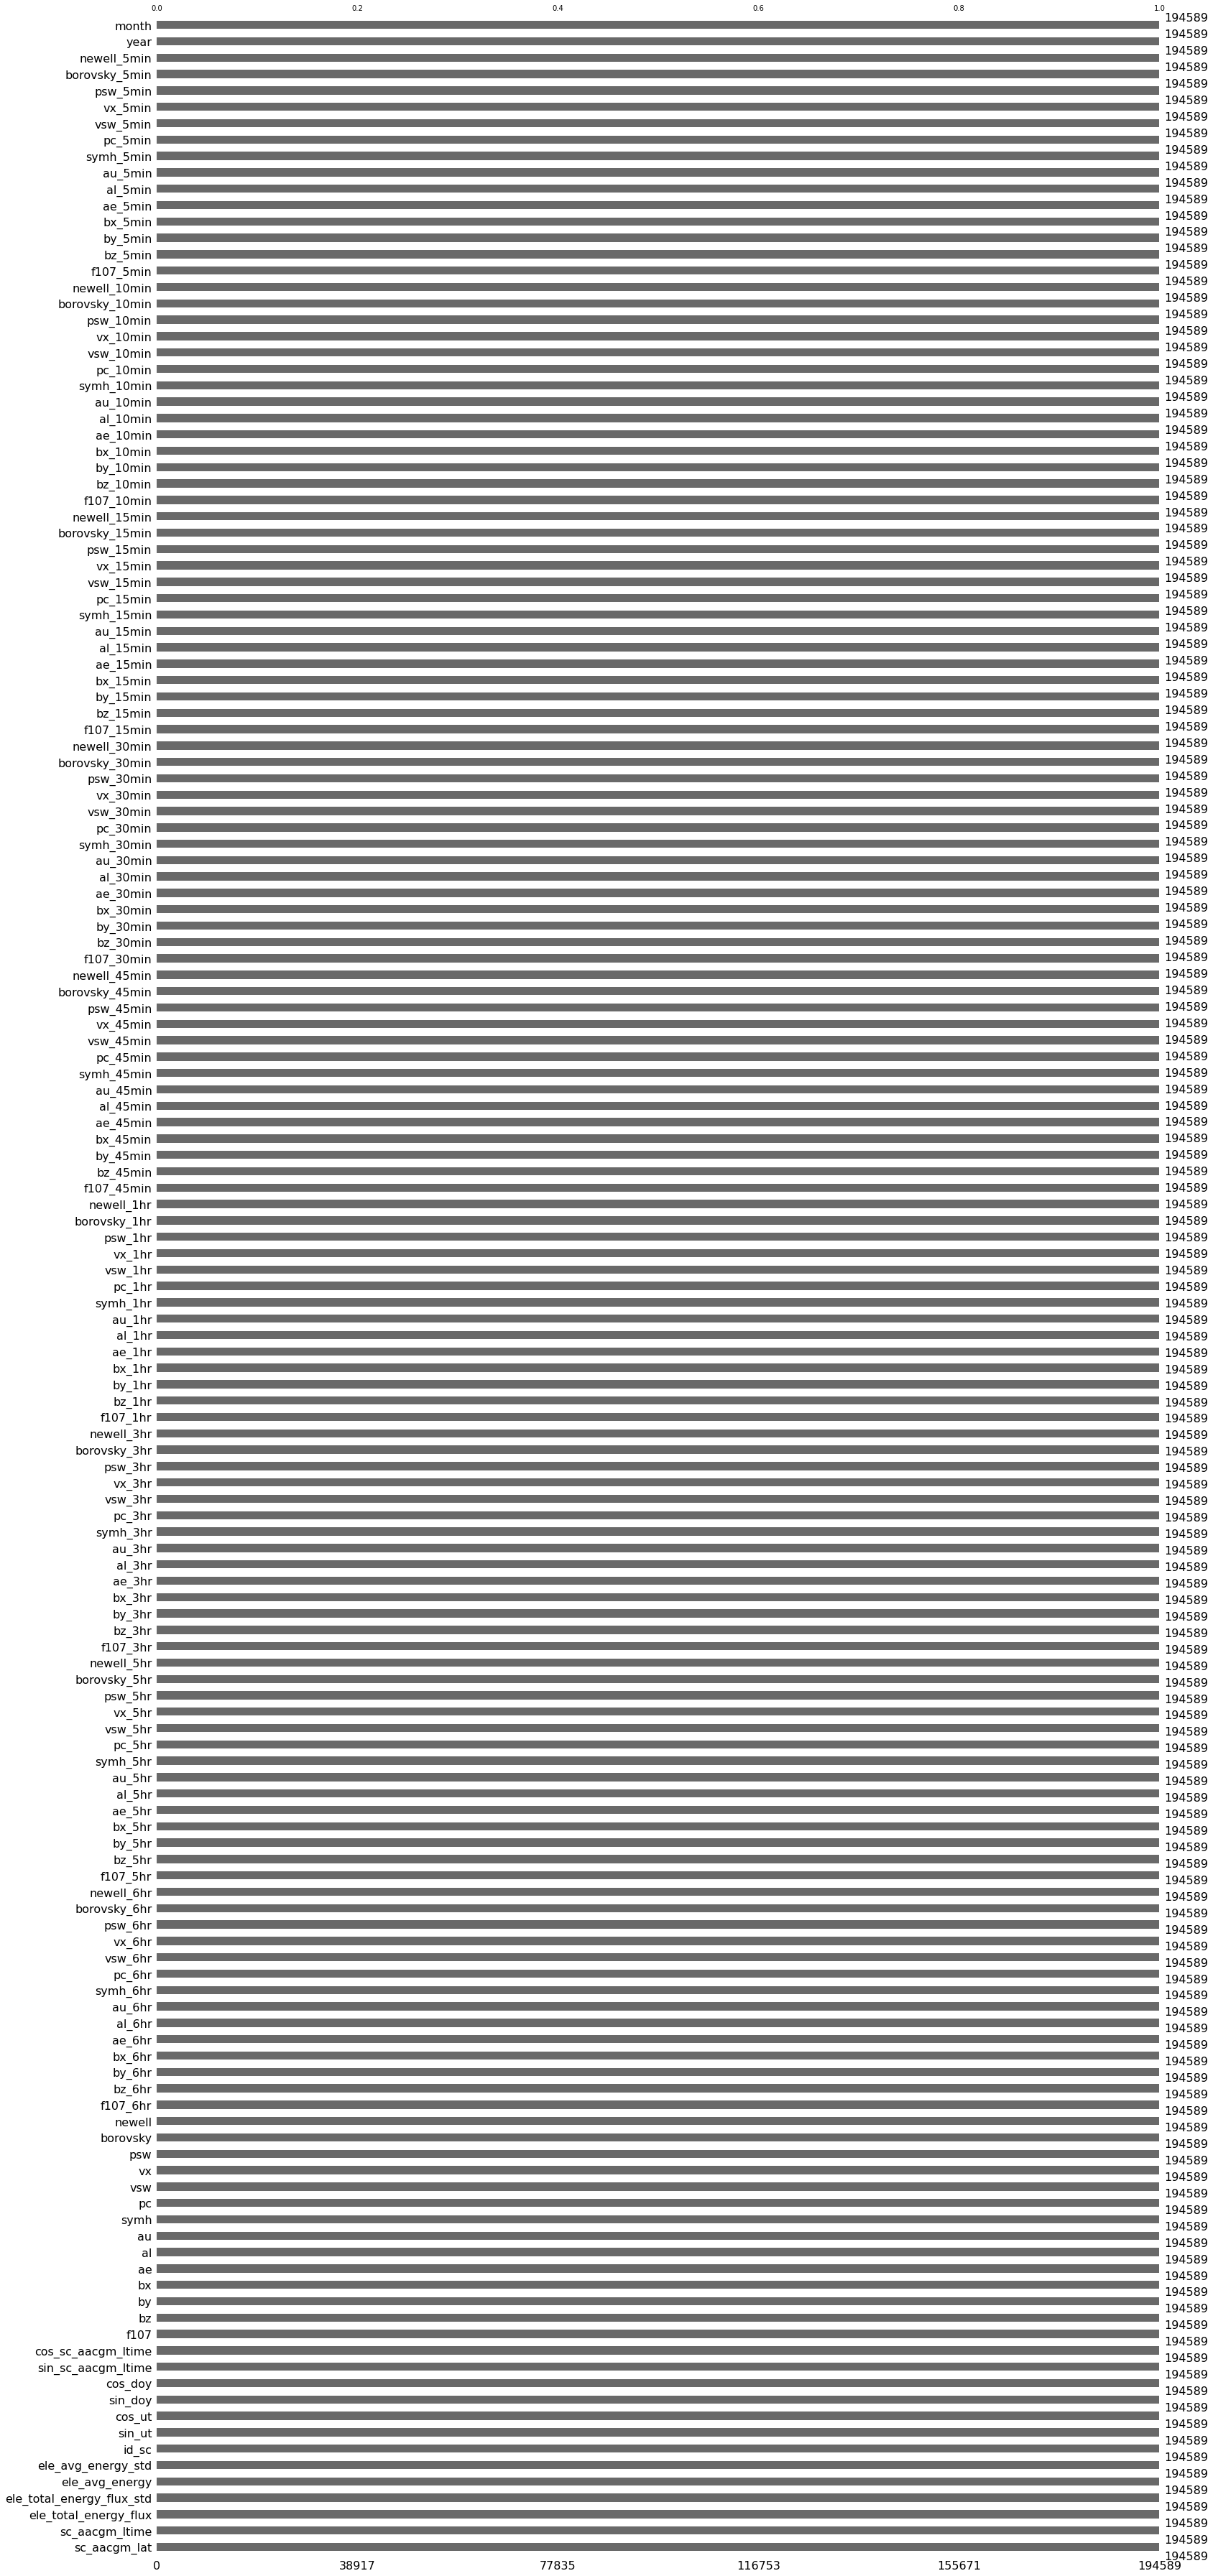

In [ ]:
msno.bar(df)

No missing values in the data set.

<b> Checking the data distribution to find any skewness in the data <b>

<b>Skew: <b>
* If the absolute value of skew<0.5 then very symmetric.
* If the absolute value of skew is in between 0.5 and 1 then slightly skewed
* If the absolute value of skew is greater than 1 then very skewed.



In [54]:
df_stat=pd.DataFrame()
df_stat['mean']=df.mean(axis=0).round(decimals=5)
df_stat['median']=df.median(axis=0).round(decimals=5)
df_stat['std']=df.std(axis=0).round(decimals=5)
df_stat['skew']=df.skew(axis=0).round(decimals=5)
df_stat['abs_skew']=abs(df.skew(axis=0).round(decimals=5))
df_stat['kurtosis']=abs(df.kurt(axis=0).round(decimals=5))
df_stat=df_stat.set_index(df.columns)

In [ ]:
df_stat.head(3)

,mean,median,std,skew,abs_skew,kurtosis
sc_aacgm_lat,6.569678e+01,6.685040e+01,1.110504e+01,-0.09837,0.09837,0.98339
sc_aacgm_ltime,1.216974e+01,1.058760e+01,6.186130e+00,0.07001,0.07001,1.27760
ele_total_energy_flux,3.119309e+11,5.580742e+08,4.979141e+13,236.23384,236.23384,62077.58813


<b> Checking the columns having abs(skew) <0.5 - Normal distribution <b> 

In [55]:
skew_ltp5=df[df.columns[abs(df.skew(axis=0)<0.5)]]
skew_ltp5.shape

(194589, 66)

No handles with labels found to put in legend.


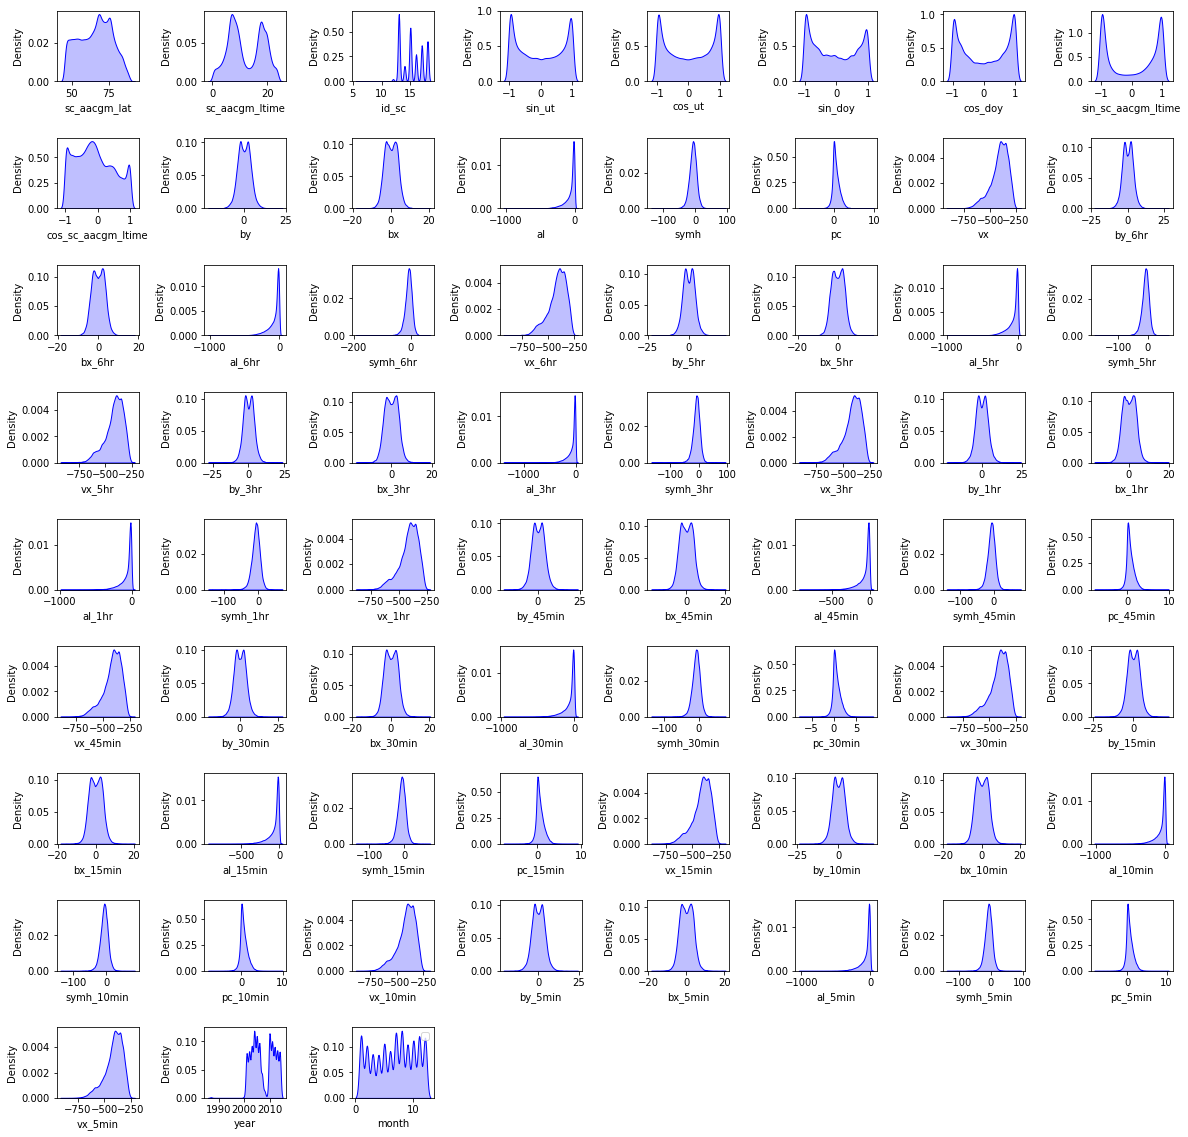

In [ ]:
#skew_pos=df[df.columns[abs(df.skew(axis=0)<0.5)]]
plt.figure(figsize =(20,20))
for i in enumerate(skew_ltp5.columns):
    plt.subplot(9,8,i[0]+1)
    sns.kdeplot(df[i[1]], shade=True, color="b")
    plt.subplots_adjust(hspace = 0.8)
    plt.subplots_adjust(wspace = 0.8)
plt.legend()

<b> Columns with severe skewness <b>

In [57]:
skew_severe=df[df.columns[abs(df.skew(axis=0))>1.0]]
skew_severe.shape

(194589, 76)

No handles with labels found to put in legend.


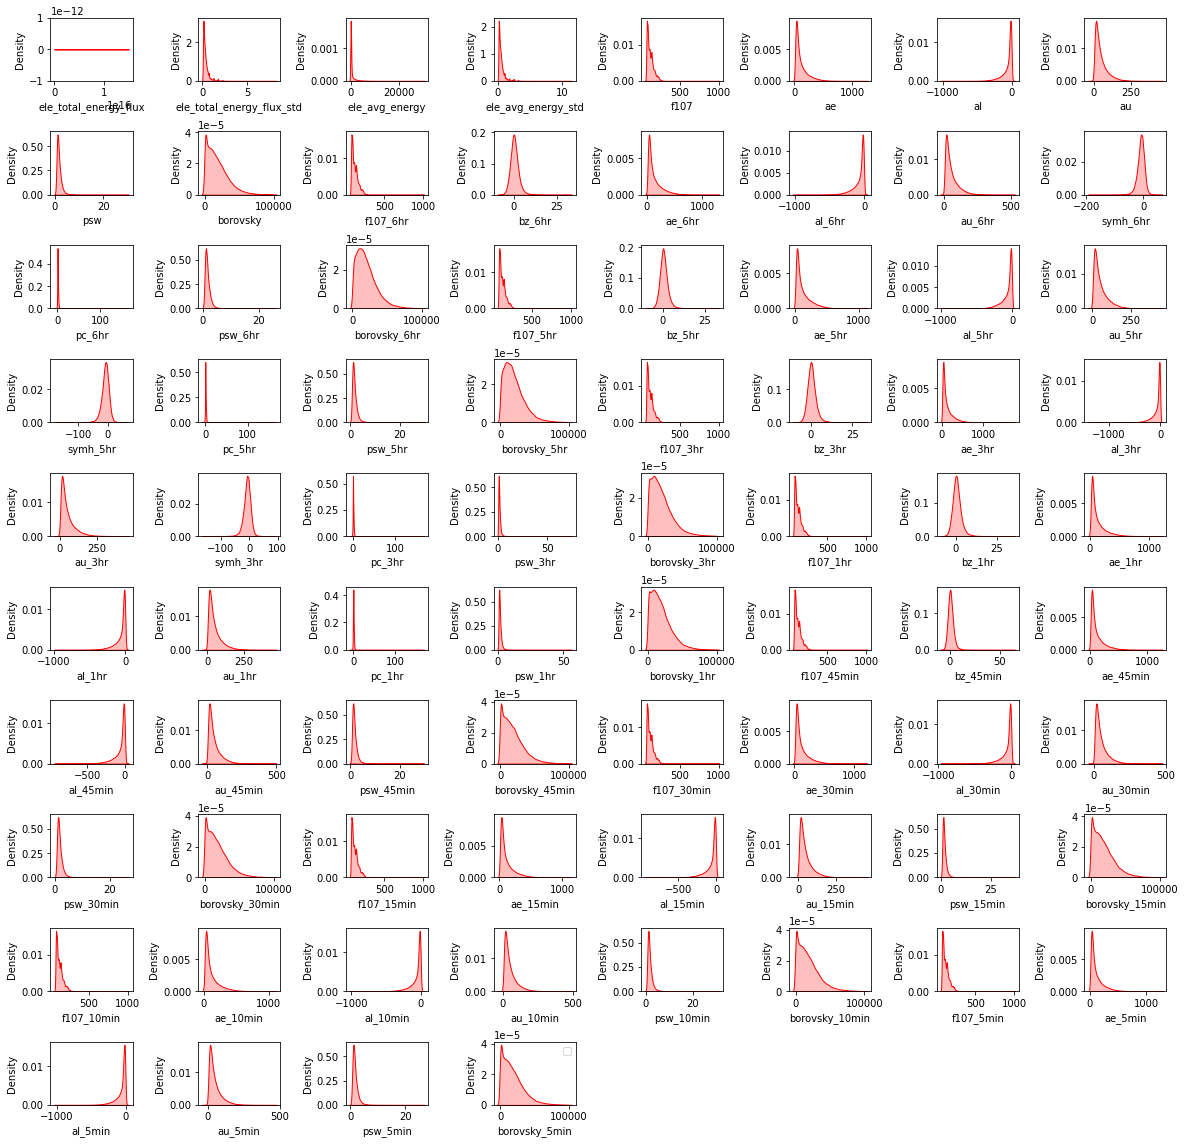

In [58]:
plt.figure(figsize =(20,20))
for i in enumerate(skew_severe.columns):
    plt.subplot(10,8,i[0]+1)
    sns.kdeplot(df[i[1]], shade=True, color="r")
    plt.subplots_adjust(hspace = 0.8)
    plt.subplots_adjust(wspace = 0.8)
plt.legend()

<b> Kutosis <b>
* High kurtosis in a data set is an indicator that data has heavy outliers.
* Low kurtosis in a data set is an indicator that data has lack of outliers.
* If kurtosis value + means pointy and — means flat.

<b> Kurtosis <b> -Presence of outlier distribution in the columns

In [ ]:
t=df_stat.sort_values('kurtosis',ascending=False)

<b>Platykurtic: (Kurtosis < 3)<b>

No handles with labels found to put in legend.


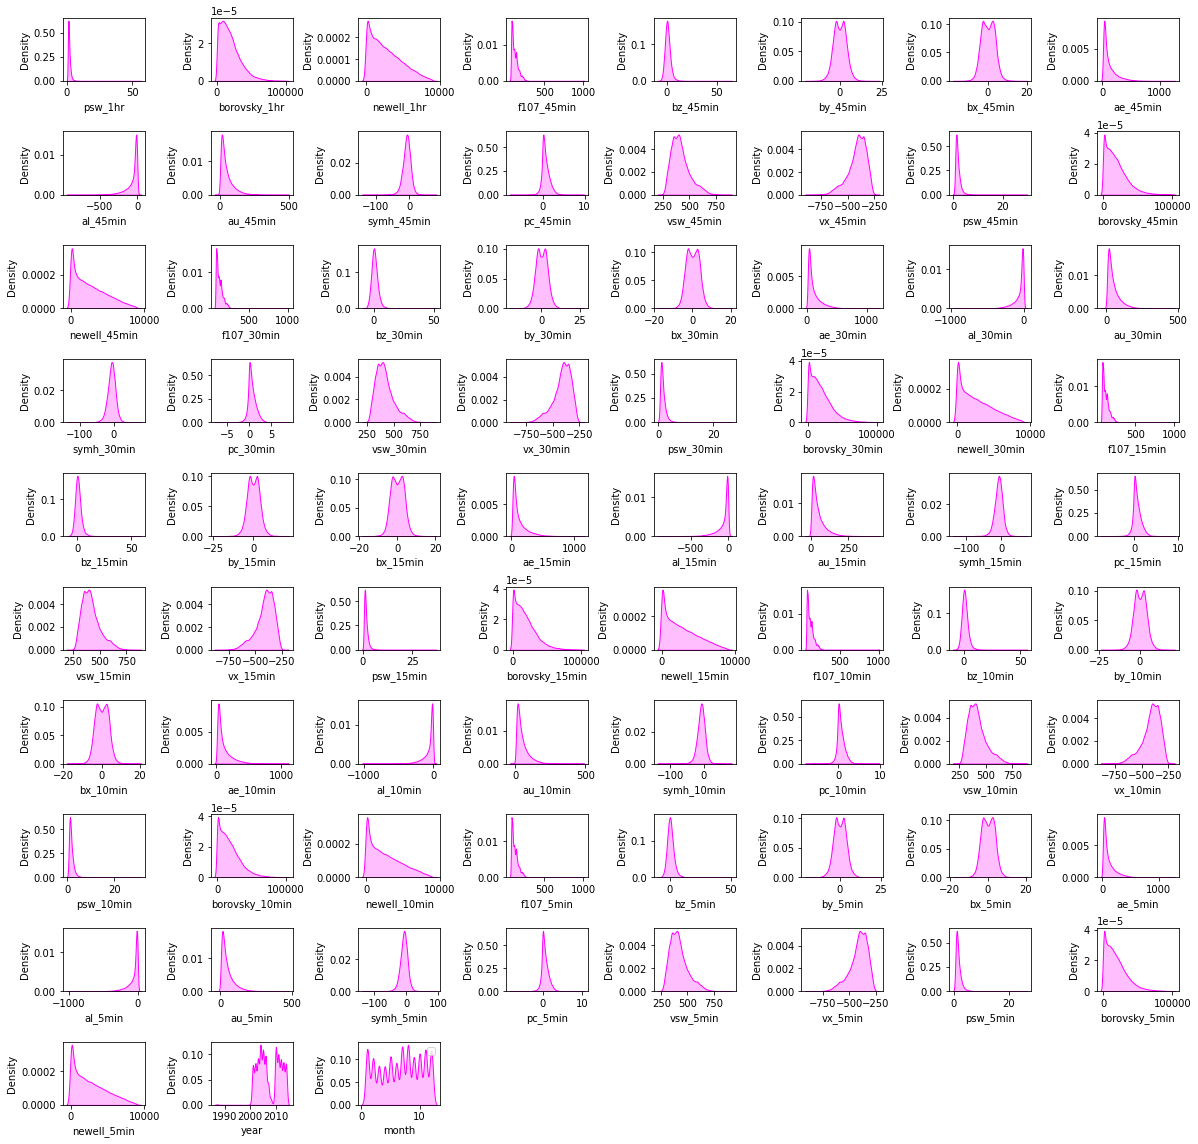

In [ ]:
plt.figure(figsize =(20,20))
for i in enumerate(df[df_stat.index[t['kurtosis']<3.0]]):
    plt.subplot(10,8,i[0]+1)
    sns.kdeplot(df[i[1]], shade=True, color="y")
    plt.subplots_adjust(hspace = 0.8)
    plt.subplots_adjust(wspace = 0.8)
plt.legend()

<b> Leptokurtic (Kurtosis > 3) <b>

No handles with labels found to put in legend.


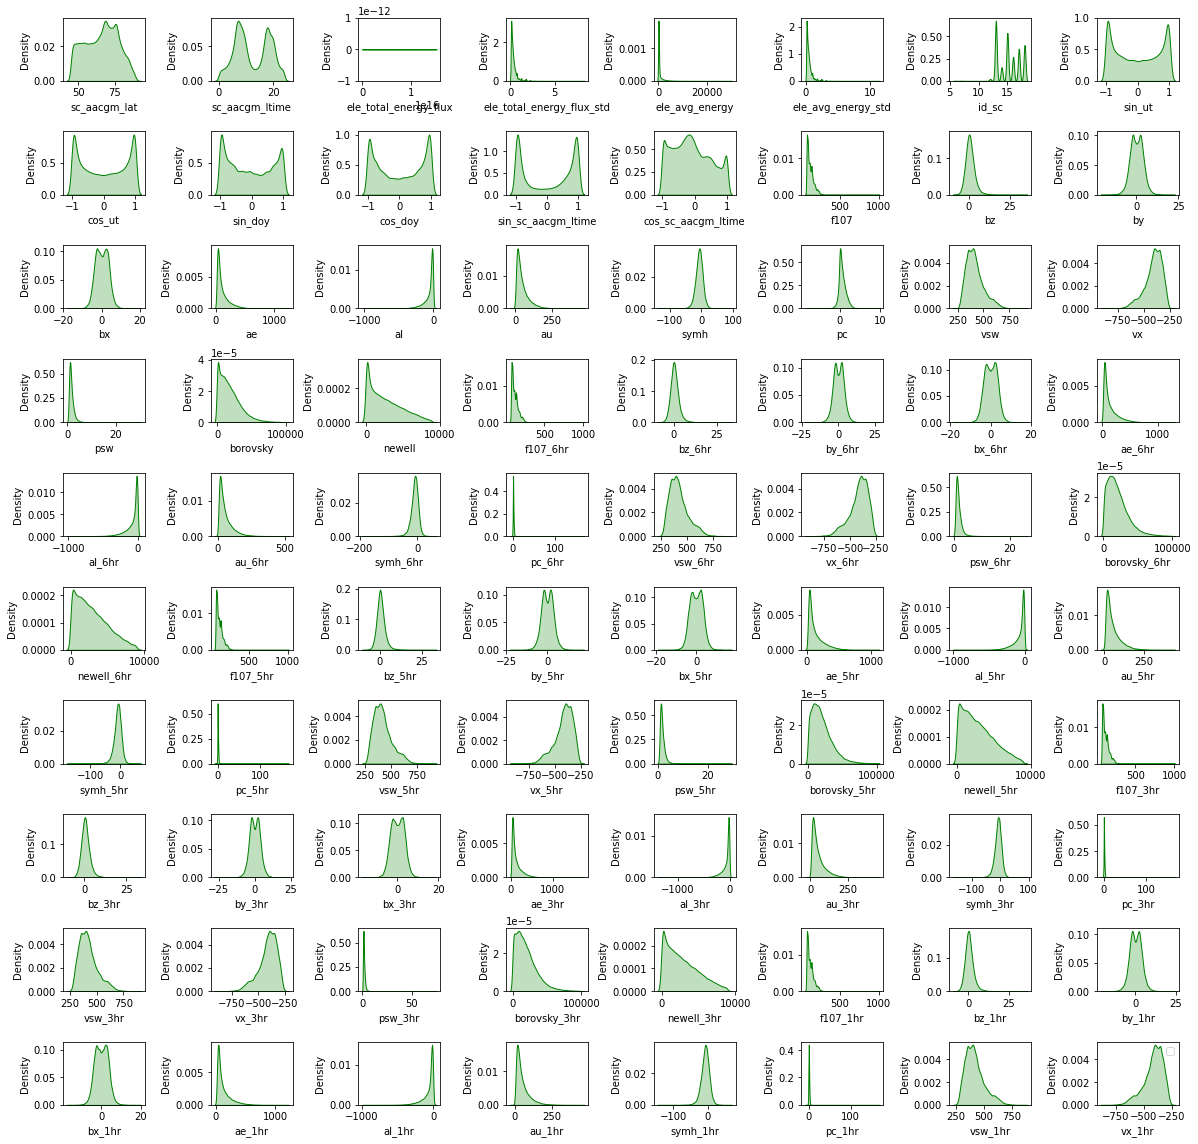

In [ ]:
plt.figure(figsize =(20,20))
for i in enumerate(df[df_stat.index[t['kurtosis']>3.0]]):
    plt.subplot(10,8,i[0]+1)
    sns.kdeplot(df[i[1]], shade=True, color="g")
    plt.subplots_adjust(hspace = 0.8)
    plt.subplots_adjust(wspace = 0.8)
plt.legend()

<b> Target column <b>

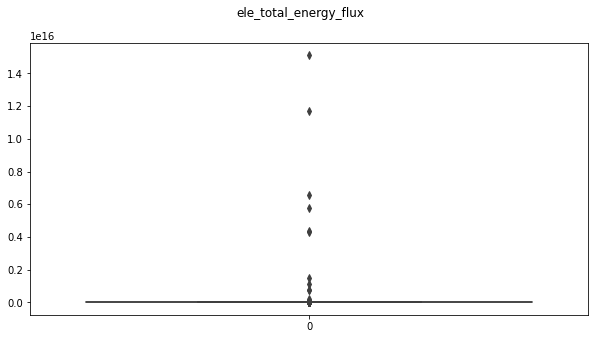

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("ele_total_energy_flux")
bp=sns.boxplot(data=df['ele_total_energy_flux'])
plt.show()

We will remove the outliers in the target column by specifying the threshold value = 99.

Anything above the value corresponding to the perccentile ,would be removed.

In [10]:
per = 99
threshold_val = np.percentile(df['ele_total_energy_flux'],per)
print(threshold_val)
n_df=df.drop(df[df['ele_total_energy_flux']>threshold_val].index)
n_df.shape   

691662135999.9985


(192643, 154)

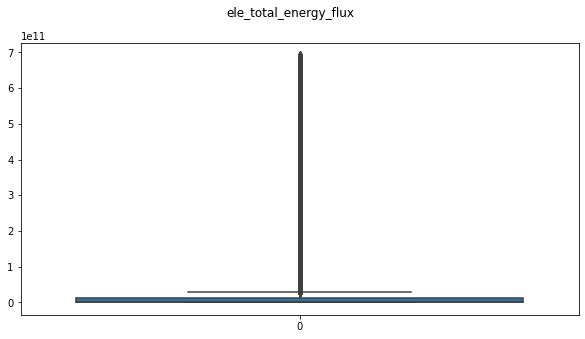

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("ele_total_energy_flux")
bp=sns.boxplot(data=n_df['ele_total_energy_flux'])
plt.show()

In [11]:
target=n_df["ele_total_energy_flux"]
n_df.drop(columns='ele_total_energy_flux',axis=0,inplace=True)

<b> Dropping the columns <b>

In [12]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())

['sc_aacgm_lat', 'sc_aacgm_ltime', 'ele_total_energy_flux', 'ele_total_energy_flux_std', 'ele_avg_energy', 'ele_avg_energy_std', 'id_sc', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_sc_aacgm_ltime', 'cos_sc_aacgm_ltime', 'f107', 'bz', 'by', 'bx', 'ae', 'al', 'au', 'symh', 'pc', 'vsw', 'vx', 'psw', 'borovsky', 'newell', 'f107_6hr', 'bz_6hr', 'by_6hr', 'bx_6hr', 'ae_6hr', 'al_6hr', 'au_6hr', 'symh_6hr', 'pc_6hr', 'vsw_6hr', 'vx_6hr', 'psw_6hr', 'borovsky_6hr', 'newell_6hr', 'f107_5hr', 'bz_5hr', 'by_5hr', 'bx_5hr', 'ae_5hr', 'al_5hr', 'au_5hr', 'symh_5hr', 'pc_5hr', 'vsw_5hr', 'vx_5hr', 'psw_5hr', 'borovsky_5hr', 'newell_5hr', 'f107_3hr', 'bz_3hr', 'by_3hr', 'bx_3hr', 'ae_3hr', 'al_3hr', 'au_3hr', 'symh_3hr', 'pc_3hr', 'vsw_3hr', 'vx_3hr', 'psw_3hr', 'borovsky_3hr', 'newell_3hr', 'f107_1hr', 'bz_1hr', 'by_1hr', 'bx_1hr', 'ae_1hr', 'al_1hr', 'au_1hr', 'symh_1hr', 'pc_1hr', 'vsw_1hr', 'vx_1hr', 'psw_1hr', 'borovsky_1hr', 'newell_1hr', 'f107_45min', 'bz_45min', 'by_45min', 'bx_45min', 'a

In [13]:
col_drop=[]
for col in n_df.columns:
  if (('1min' in col) | ('3min' in col) | ('4min' in col) | ('_5min'in col) | ('15min' in col)| ('5hr' in col) | ('avg' in col)|('std' in col)):
    print(col,',',end=' ')
    col_drop.append(col)

ele_total_energy_flux_std , ele_avg_energy , ele_avg_energy_std , f107_5hr , bz_5hr , by_5hr , bx_5hr , ae_5hr , al_5hr , au_5hr , symh_5hr , pc_5hr , vsw_5hr , vx_5hr , psw_5hr , borovsky_5hr , newell_5hr , f107_15min , bz_15min , by_15min , bx_15min , ae_15min , al_15min , au_15min , symh_15min , pc_15min , vsw_15min , vx_15min , psw_15min , borovsky_15min , newell_15min , f107_5min , bz_5min , by_5min , bx_5min , ae_5min , al_5min , au_5min , symh_5min , pc_5min , vsw_5min , vx_5min , psw_5min , borovsky_5min , newell_5min , 

We shall retain columns with 6hr observation and drop columns < 6hrs and ele_avg_energy,ele_total_energy_flux_std

In [14]:
n_df.drop(col_drop,axis=1,inplace=True)
n_df.drop(columns='year',axis=1,inplace=True)
n_df.shape

(192643, 107)

In [15]:
rob_scaler = preprocessing.RobustScaler()
r_scaled = rob_scaler.fit(n_df)
X= r_scaled.transform(n_df)
X.shape

(192643, 107)

In [16]:
train_df=pd.DataFrame(X,columns = n_df.columns)
#Transforming the target column in log scale.
Y=np.log10(target)                          

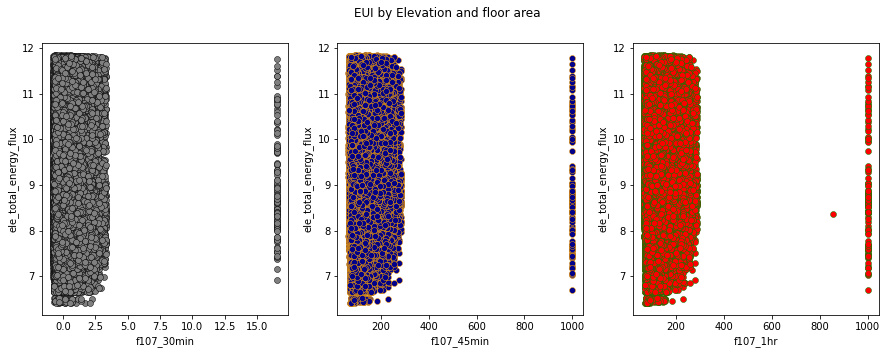

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("EUI by Elevation and floor area")
plt.subplots_adjust(hspace = 0.8)
sns.scatterplot(x='f107_30min',y=Y,data=df,color='gray',ax=ax[0],edgecolor ='black')
sns.scatterplot(x='f107_45min',y=Y,data=df,color='darkblue',ax=ax[1],edgecolor ='orange')
sns.scatterplot(x='f107_1hr',y=Y,data=df,color='red',ax=ax[2],edgecolor ='green')

<b> Obsertaion <b> 
* For all falvors of f107, Majorly all data points are aligned to 0. we can observe many outliers too.

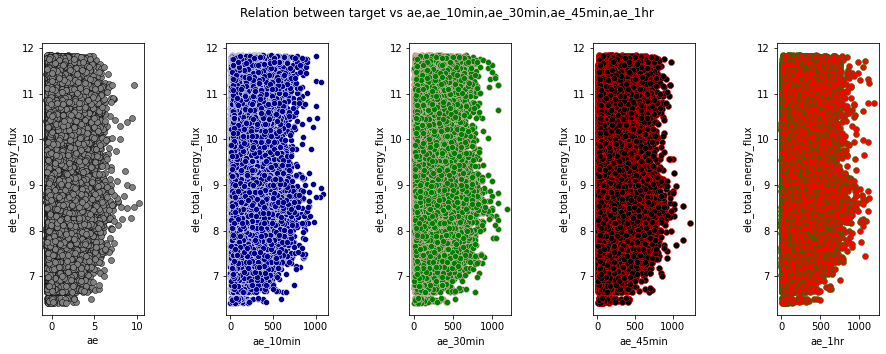

In [42]:
fig, ax = plt.subplots(1,5, figsize=(15,8))
fig.suptitle("Relation between target vs ae,ae_10min,ae_30min,ae_45min,ae_1hr")
plt.subplots_adjust(wspace = 0.8)
sns.scatterplot(x='ae',y=Y,data=train_df,color='gray',ax=ax[0],edgecolor ='black')
sns.scatterplot(x='ae_10min',y=Y,data=df,color='darkblue',ax=ax[1],edgecolor ='white')
sns.scatterplot(x='ae_30min',y=Y,data=df,color='green',ax=ax[2],edgecolor ='pink')
sns.scatterplot(x='ae_45min',y=Y,data=df,color='black',ax=ax[3],edgecolor ='red')
sns.scatterplot(x='ae_1hr',y=Y,data=df,color='red',ax=ax[4],edgecolor ='green')

<b> Observation <b>
* In all time duration of ae,the energy flux is distributed from 0 upto 12 units
* As ae increased beyond 700,the distribution is not dense in all time variation of ae except ae  

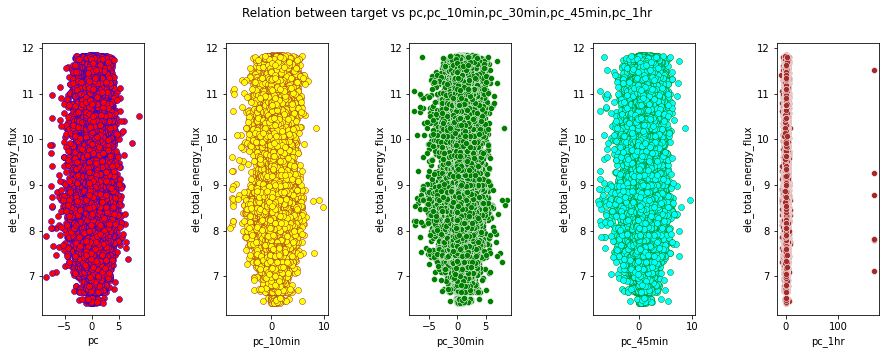

In [50]:
fig, ax = plt.subplots(1,5, figsize=(15,5))
fig.suptitle("Relation between target vs pc,pc_10min,pc_30min,pc_45min,pc_1hr")
plt.subplots_adjust(wspace = 0.8)
sns.scatterplot(x='pc',y=Y,data=train_df,color='red',ax=ax[0],edgecolor ='blue')
sns.scatterplot(x='pc_10min',y=Y,data=df,color='yellow',ax=ax[1],edgecolor ='brown')
sns.scatterplot(x='pc_30min',y=Y,data=df,color='green',ax=ax[2],edgecolor ='white')
sns.scatterplot(x='pc_45min',y=Y,data=df,color='cyan',ax=ax[3],edgecolor ='green')
sns.scatterplot(x='pc_1hr',y=Y,data=df,color='brown',ax=ax[4],edgecolor ='white')

<b>Observation<b>

* Majorly all datapoints are centered around 0 with devation between -5 to 5
* pc_hr - all datapoints are aligned in 0 and few outliers can be seen

### Correlation

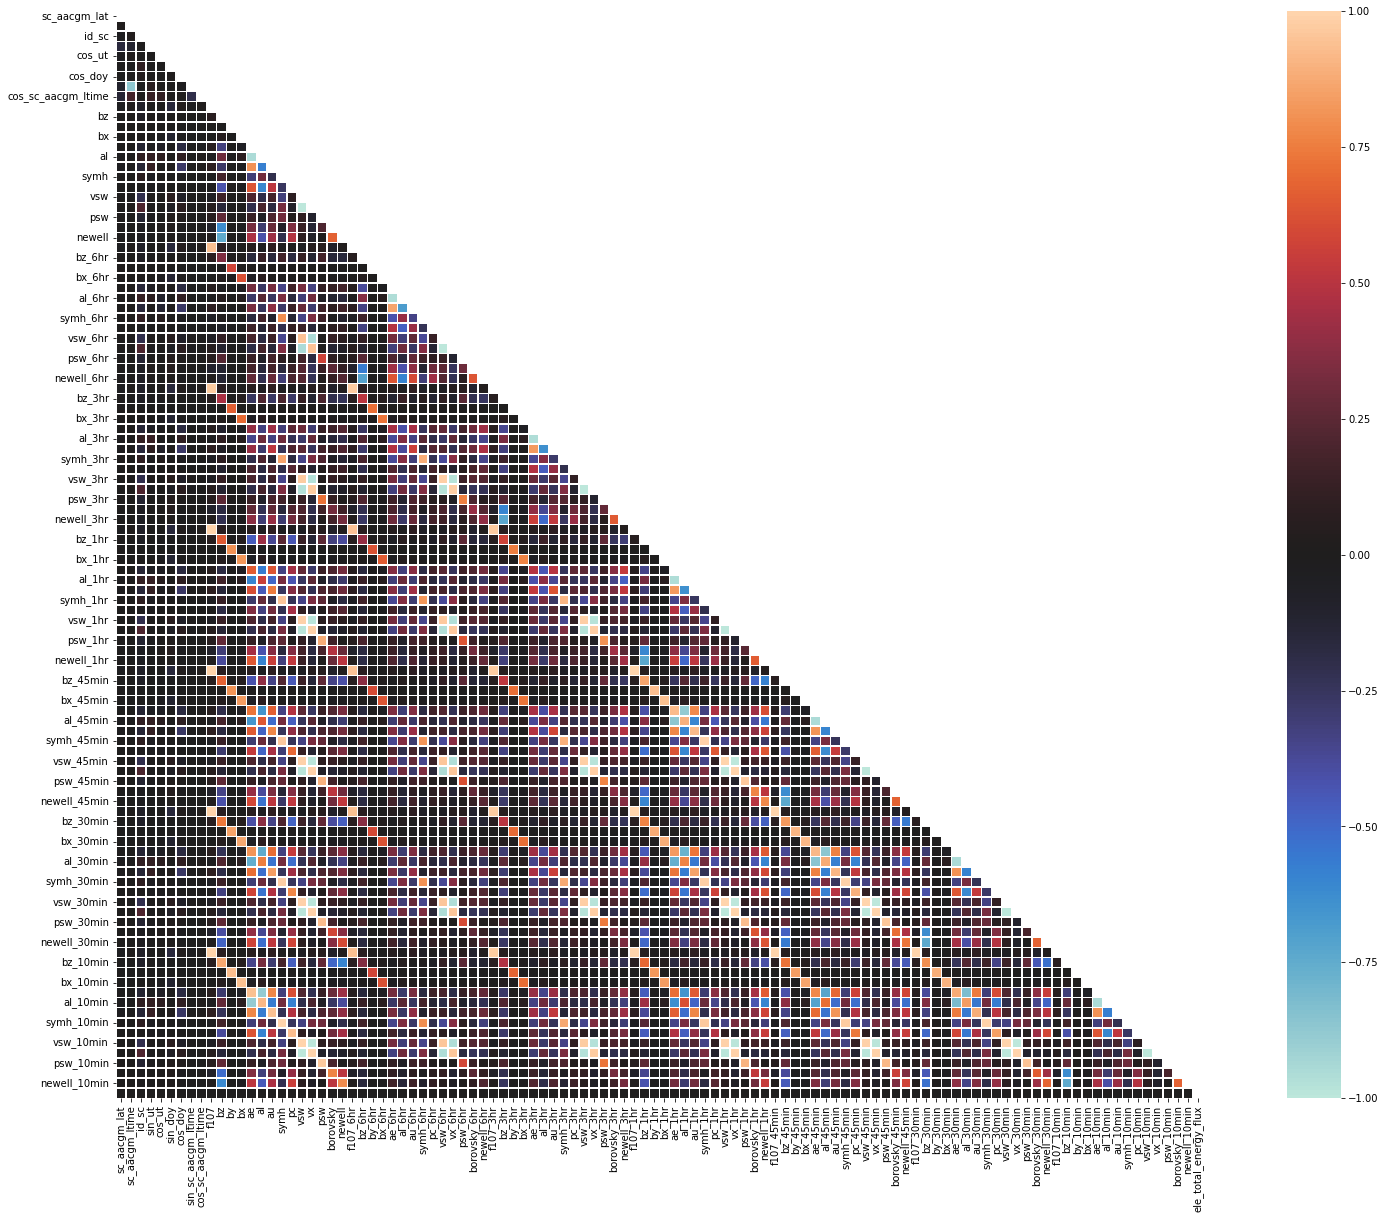

In [22]:
corr_df=train_df.join(Y)
plt.figure(figsize=(30,20))
cor_df=corr_df.corr()
mask=np.zeros_like(cor_df)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(cor_df,  vmin=-1, vmax=1, center=0,
     square=True,linewidth=0.5,mask=mask)

In [34]:
#Positively correlated variables
c = cor_df.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
pos_corr=so[11450:]
pos_corr.drop_duplicates(inplace=True)
print(pos_corr)

vsw_45min     vx              0.988696
vx_45min      vx              0.988767
vsw_10min     vx_1hr          0.989311
vsw_1hr       vsw_10min       0.989499
              vx_10min        0.989532
vx_10min      vx_1hr          0.989570
vx_45min      vsw_10min       0.990027
symh_1hr      symh_45min      0.990030
vx_10min      vsw_45min       0.990173
vsw_45min     vsw_10min       0.990174
vx_45min      vx_10min        0.990267
vx_30min      vsw             0.990913
vx            vsw_30min       0.991028
vsw           vsw_30min       0.991047
vx_30min      vx              0.991138
vsw_30min     vx_1hr          0.992375
symh_10min    symh            0.992375
vx_30min      vsw_1hr         0.992527
vsw_30min     vsw_1hr         0.992542
vx_1hr        vx_30min        0.992598
vsw_10min     vx_30min        0.992941
vsw_30min     vx_10min        0.993009
              vsw_10min       0.993067
vx_10min      vx_30min        0.993139
f107_1hr      f107            0.993251
              f107_10min 

<b> Feature Selection Method - mutual_info_regression <b>



Feature selection

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_df, Y, test_size=0.33, random_state=1)

In [15]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=67)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
#model = LinearRegression()
model=RandomForestRegressor(n_estimators=10,random_state=1)
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
#mae = mean_absolute_error(y_test, yhat)
rmse=mean_squared_error(y_test, yhat,squared=False)
print('RMSE: %.3f' % rmse)

RMSE: 0.711


<b> Selecting 67 features as it gave least RMSE values

Feature ranking:
1. feature 0 (0.301465) - sc_aacgm_lat
2. feature 2 (0.288033) - id_sc
3. feature 1 (0.083311) - sc_aacgm_ltime
4. feature 7 (0.052088) - sin_sc_aacgm_ltime
5. feature 8 (0.049916) - cos_sc_aacgm_ltime
6. feature 79 (0.044809) - f107_30min
7. feature 65 (0.044489) - f107_45min
8. feature 51 (0.044466) - f107_1hr
9. feature 93 (0.044369) - f107_10min
10. feature 9 (0.043912) - f107
11. feature 23 (0.042223) - f107_6hr
12. feature 37 (0.040837) - f107_3hr
13. feature 55 (0.018937) - ae_1hr
14. feature 15 (0.018843) - au
15. feature 83 (0.018463) - ae_30min
16. feature 69 (0.018427) - ae_45min
17. feature 56 (0.017469) - al_1hr
18. feature 13 (0.016896) - ae
19. feature 57 (0.015262) - au_1hr
20. feature 59 (0.014474) - pc_1hr
21. feature 71 (0.014436) - au_45min
22. feature 70 (0.013006) - al_45min
23. feature 97 (0.012982) - ae_10min
24. feature 42 (0.012978) - al_3hr
25. feature 98 (0.012938) - al_10min
26. feature 5 (0.012605) - sin_doy
27. feature 17 (0.012552) - pc


Text(0.5, 1.0, 'Mutual info - Feature Importance Plot')

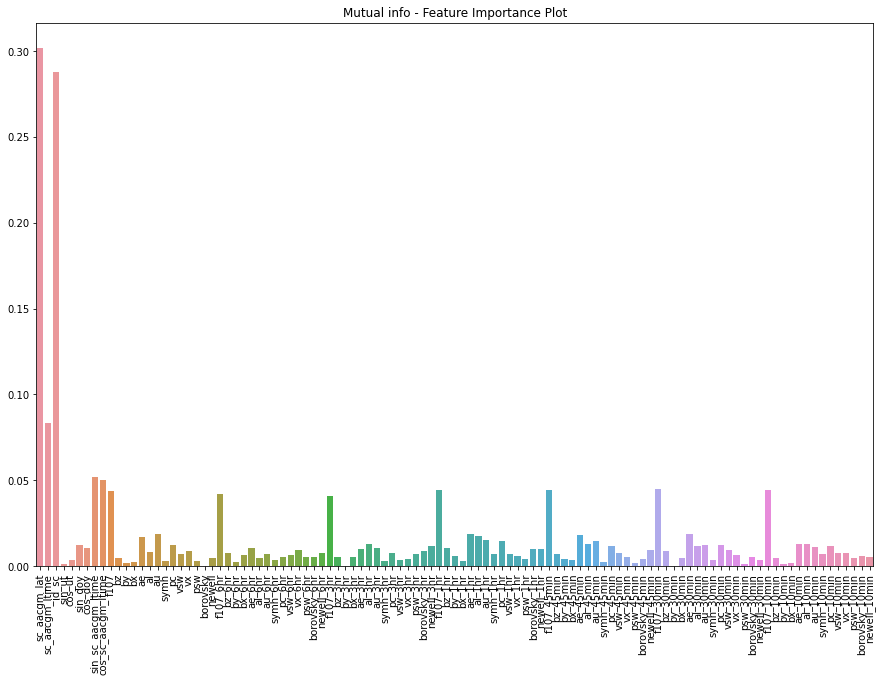

In [16]:
#Feature Ranking 
#X_traindf = pd.DataFrame(data = X_train) 
importances = fs.scores_

indices = np.argsort(importances)[::-1]
copy_Numerical= indices
print("Feature ranking:")

for f in range(train_df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),'-',train_df.columns[indices[f]])

# plot the scores
plt.figure(figsize=(15,10))
sns.barplot(y = fs.scores_,x = train_df.columns)
plt.xticks(rotation=90)
plt.title('Mutual info - Feature Importance Plot')    

In [17]:
#Selecting top 67 features giving 0.711 RMSE values
df_67=train_df.iloc[:,indices.tolist()[0:67]]


<b> Model building<b>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_67, Y, test_size=0.33, random_state=1)

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               8704      
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 173,569
Trainable params: 173,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=10,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

In [ ]:
NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 103256 samples, validate on 25814 samples
Epoch 1/100
102848/103256 [============================>.] - ETA: 0s - loss: 0.4830 - root_mean_squared_error: 0.6851
Epoch 1: val_root_mean_squared_error improved from inf to 0.72284, saving model to Weights-001--0.51212.hdf5
103256/103256 [==============================] - 20s 192us/sample - loss: 0.4832 - root_mean_squared_error: 0.6854 - val_loss: 0.5121 - val_root_mean_squared_error: 0.7228
Epoch 2/100
102784/103256 [============================>.] - ETA: 0s - loss: 0.4817 - root_mean_squared_error: 0.6848
Epoch 2: val_root_mean_squared_error did not improve from 0.72284
103256/103256 [==============================] - 12s 115us/sample - loss: 0.4819 - root_mean_squared_error: 0.6849 - val_loss: 0.5171 - val_root_mean_squared_error: 0.7249
Epoch 3/100
102912/103256 [============================>.] - ETA: 0s - loss: 0.4792 - root_mean_squared_error: 0.6807
Epoch 3: val_root_mean_squared_error improved from 0.72284 to 0.71808, savin

Best RMSE:0.70192 Val_loss:0.49407 with Batch 32,epoch=100,kernel_initializer=normal,optimiser=Adam,activation relu.

## Hyper parameter tuning with early stopping

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=20,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, callbacks=[earlystop])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               8704      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dense_24 (Dense)            (None, 1)                 257       
                                                                 
Total params: 173,569
Trainable params: 173,569
Non-trainable params: 0
_________________________________________________________________
Train on 103256 samples, validate on 25814 sampl

Best RMSE:0.6999 with Batch 32,epoch=100,kernel_initializer=normal,optimiser=Adam,activation relu.

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=70,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=200, batch_size=256, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               8704      
                                                                 
 dense_51 (Dense)            (None, 256)               33024     
                                                                 
 dense_52 (Dense)            (None, 256)               65792     
                                                                 
 dense_53 (Dense)            (None, 256)               65792     
                                                                 
 dense_54 (Dense)            (None, 1)                 257       
                                                                 
Total params: 173,569
Trainable params: 173,569
Non-trainable params: 0
_________________________________________________________________
Train on 154114 samples, validate on 38529 samp

Best RMSE:0.68625 with Batch 256,epoch=200,kernel_initializer=normal,optimiser=Adam,activation relu.Hidden layers=3

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=20,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=200, batch_size=500, validation_split = 0.2, callbacks=[earlystop])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               8704      
                                                                 
 dense_31 (Dense)            (None, 256)               33024     
                                                                 
 dense_32 (Dense)            (None, 256)               65792     
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dense_34 (Dense)            (None, 1)                 257       
                                                                 
Total params: 173,569
Trainable params: 173,569
Non-trainable params: 0
_________________________________________________________________
Train on 154114 samples, validate on 38529 sampl

Best RMSE:0.6822 with

Batch 500,

epoch=200,

kernel_initializer=normal,

optimiser=Adam,

activation =relu 

Hidden layers=3

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=20,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=200, batch_size=3000, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               8704      
                                                                 
 dense_36 (Dense)            (None, 256)               33024     
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 dense_38 (Dense)            (None, 256)               65792     
                                                                 
 dense_39 (Dense)            (None, 1)                 257       
                                                                 
Total params: 173,569
Trainable params: 173,569
Non-trainable params: 0
_________________________________________________________________
Train on 154114 samples, validate on 38529 sampl

Best RMSE:0.68543 with Batch 3000:,epoch=200,kernel_initializer=normal,optimiser=Adam,activation relu.

<b> Increased the hidden layers to 8 <b>

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=40,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=200, batch_size=500, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 128)               8704      
                                                                 
 dense_56 (Dense)            (None, 256)               33024     
                                                                 
 dense_57 (Dense)            (None, 256)               65792     
                                                                 
 dense_58 (Dense)            (None, 256)               65792     
                                                                 
 dense_59 (Dense)            (None, 256)               65792     
                                                                 
 dense_60 (Dense)            (None, 256)               65792     
                                                                 
 dense_61 (Dense)            (None, 256)             

<b> Best RMSE :0.67897 <b>

Batch 500:epoch=200,kernel_initializer=normal,optimiser=Adam,activation relu.Hidden layers=8

<b> Changing number of nodes<b>

In [20]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=40,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=200, batch_size=500, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               17664     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

Best RMSE:0.68872 with Batch 500,epoch=200,kernel_initializer=normal,optimiser=Adam,activation relu.

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='he_uniform',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=40,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=200, batch_size=500, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 256)               17408     
                                                                 
 dense_76 (Dense)            (None, 256)               65792     
                                                                 
 dense_77 (Dense)            (None, 256)               65792     
                                                                 
 dense_78 (Dense)            (None, 256)               65792     
                                                                 
 dense_79 (Dense)            (None, 256)               65792     
                                                                 
 dense_80 (Dense)            (None, 256)               65792     
                                                                 
 dense_81 (Dense)            (None, 256)             

Best RMSE : 0.70955. kernel_initializer='he_uniform' is not benifting . 

Batch 500,

epoch=200,

Hidden layers=8,

optimiser=Adam,

activation =relu 

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
opt=keras.optimizers.Adam(learning_rate=0.001)
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=40,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=200, batch_size=500, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 128)               8704      
                                                                 
 dense_116 (Dense)           (None, 256)               33024     
                                                                 
 dense_117 (Dense)           (None, 256)               65792     
                                                                 
 dense_118 (Dense)           (None, 256)               65792     
                                                                 
 dense_119 (Dense)           (None, 256)               65792     
                                                                 
 dense_120 (Dense)           (None, 256)               65792     
                                                                 
 dense_121 (Dense)           (None, 256)             

Best RMSE : 0.68502. learning rate =0.001 

<b> Best RMSE sofar :0.67897 <b>

Batch 500:epoch=200,kernel_initializer=normal,optimiser=Adam,activation relu.

<b> Applying scheduler for learning rate <b>

In [ ]:
def scheduler(epoch, lr):
   if epoch < 100:
     return lr
   else:
     return lr * tf.math.exp(-0.1)
learning_decay = tf.keras.callbacks.LearningRateScheduler(scheduler)

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
opt=keras.optimizers.Adam(learning_rate=0.01)
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=30,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop,learning_decay]

NN_model.fit(df_67, Y, epochs=200, batch_size=500, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 128)               8704      
                                                                 
 dense_126 (Dense)           (None, 256)               33024     
                                                                 
 dense_127 (Dense)           (None, 256)               65792     
                                                                 
 dense_128 (Dense)           (None, 256)               65792     
                                                                 
 dense_129 (Dense)           (None, 256)               65792     
                                                                 
 dense_130 (Dense)           (None, 256)               65792     
                                                                 
 dense_131 (Dense)           (None, 256)             

Best RMSE :0.6907 learning rate scheduler.

Batch 500,

epoch=200,

kernel_initializer=normal,

optimiser=Adam,

activation =relu 

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=40,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=500, batch_size=500, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8704      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               6

Best RMSE :68157 Batch 500:epoch=500,kernel_initializer=normal,optimiser=Adam,activation relu.

Changing the hidden nodes in first layer and 9 hidden layers 

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers 9 :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=20,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=200, batch_size=500, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               17408     
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dense_24 (Dense)            (None, 256)               65792     
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dense_26 (Dense)            (None, 256)              

Best RMSE:0.68608

Batch 500,

epoch=200,

kernel_initializer=normal,

optimiser=Adam,

activation =relu 

Hidden layers =9

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=20,    restore_best_weights=True)

callbacks_list = [checkpoint,earlystop]

NN_model.fit(df_67, Y, epochs=200, batch_size=16, validation_split = 0.2, callbacks=callbacks_list)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               8704      
                                                                 
 dense_32 (Dense)            (None, 256)               33024     
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dense_34 (Dense)            (None, 256)               65792     
                                                                 
 dense_35 (Dense)            (None, 256)               65792     
                                                                 
 dense_36 (Dense)            (None, 256)               65792     
                                                                 
 dense_37 (Dense)            (None, 256)              

Best RMSE:0.68429

Batch=16,

epoch=200,

kernel_initializer=normal,

optimiser=Adam,

activation =relu 

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.8))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.8))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.8))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.8))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.8))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.8))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.8))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')

#earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=20,    restore_best_weights=True)

callbacks_list = [checkpoint]

NN_model.fit(df_67, Y, epochs=200, batch_size=500, callbacks=callbacks_list)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 128)               8704      
                                                                 
 dense_54 (Dense)            (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_55 (Dense)            (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_56 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)              

RMSE:0.87158 with drop out initializer

Batch 500,

epoch=200,

kernel_initializer=normal,

optimiser=Adam,

activation =relu 


## Final Model Evaluation with 10 Fold Cross validation starting with base RMSE =0.67897


In [54]:
checkpoint_name = 'Weights-{epoch:03d}--{val_root_mean_squared_error:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_root_mean_squared_error', verbose = 0, save_best_only = True, mode ='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=10,    restore_best_weights=True)
callbacks_list = [checkpoint,earlystop]
def evaluateModel(mod):
    cv= KFold(n_splits=10,shuffle=True,random_state=11)
    dataX=df_67
    dataY=Y
    count=0
    for train,test in cv.split(dataX,dataY):
        histories = list()
        #Define Model
        #select data to fit the model
        Xtrain, Ytrain, Xval, Yval = dataX.iloc[train], dataY.iloc[train], dataX.iloc[test], dataY.iloc[test]
        #
        history=mod.fit(Xtrain, Ytrain,epochs=200,batch_size=256,verbose=0,validation_data=(Xval, Yval),callbacks=callbacks_list)
        count+=1
        #Capturing loss and accuracy
        loss, rmse = mod.evaluate(Xval, Yval, verbose=0)
        print('__________________________________________________')
        print('Fold ',count,':','Validation Loss :',loss)
        print('          RMSE            :',rmse)
        histories.append(history)
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Mean Absolute error')
        plt.xlabel('epochs')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))

        # plot accuracy
        plt.subplot(212)
        plt.title('RMSE')
        plt.xlabel('epochs')
        plt.ylabel('rmse')
        #plt.title('Accuracy vs No. of epochs')
        plt.plot(histories[i].history['root_mean_squared_error'], color='blue', label='train')
        plt.plot(histories[i].history['val_root_mean_squared_error'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.tight_layout(pad=3.0)
    plt.show() 

    loss, val_rmse = mod.evaluate(Xval, Yval, verbose=0)
    
    print('Testing loss \t', loss)
    print('Testing rmse \t', val_rmse)
    return mod


__________________________________________________
Fold  1 : Validation Loss : 0.46596813194478853
          RMSE            : 0.6752265
__________________________________________________
Fold  2 : Validation Loss : 0.4485772545480617
          RMSE            : 0.648881
__________________________________________________
Fold  3 : Validation Loss : 0.4329043444305032
          RMSE            : 0.6300353
__________________________________________________
Fold  4 : Validation Loss : 0.43325797441195807
          RMSE            : 0.6267566
__________________________________________________
Fold  5 : Validation Loss : 0.41626874164390404
          RMSE            : 0.6154965
__________________________________________________
Fold  6 : Validation Loss : 0.4111051021570779
          RMSE            : 0.6107742
__________________________________________________
Fold  7 : Validation Loss : 0.4202981990239153
          RMSE            : 0.6154584
______________________________________________

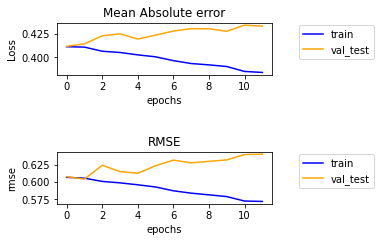

Testing loss 	 0.41420618731813175
Testing rmse 	 0.6040328


In [55]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_67.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
opt=keras.optimizers.Adam(learning_rate=0.001)
# Compile the network :
NN_model.compile(loss='mean_absolute_error',optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
mod=evaluateModel(NN_model)

In [56]:
mod=mod.load_weights('Weights-001--0.40906.hdf5')
mod.save('keras_dl2best.h5')

In [21]:
from keras.models import load_model
model = load_model('keras_dl2best.h5')


In [32]:
loss, val_rmse = model.evaluate(X_test, y_test, verbose=0)
    
print('Testing loss \t', loss)
print('Testing rmse \t', val_rmse)

Testing loss 	 0.39985110350182296
Testing rmse 	 0.5900499


# Conclusion 

## Deep learning Model Best RMSE : 0.6014 with 10 fold cross validation.
## RandomForestRegressor Model Best RMSE : 0.711 
## Therefore DL Model outperforms RandomForestRegressor model

## Explainable AI

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_67, Y, test_size=0.33, random_state=1)
x_train=X_train.sample(200)
x_train=x_train.to_numpy()
x_test=X_test.to_numpy()

In [34]:
import shap
shap.initjs()

In [39]:
explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)

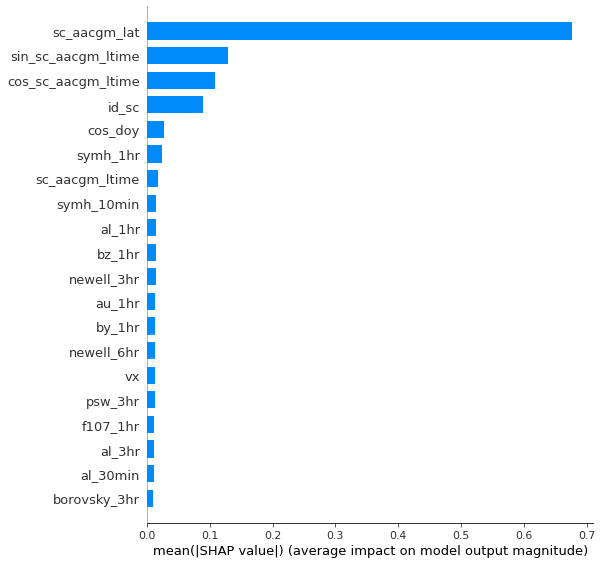

In [40]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X_test.columns)

In [41]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features = X_test.columns)


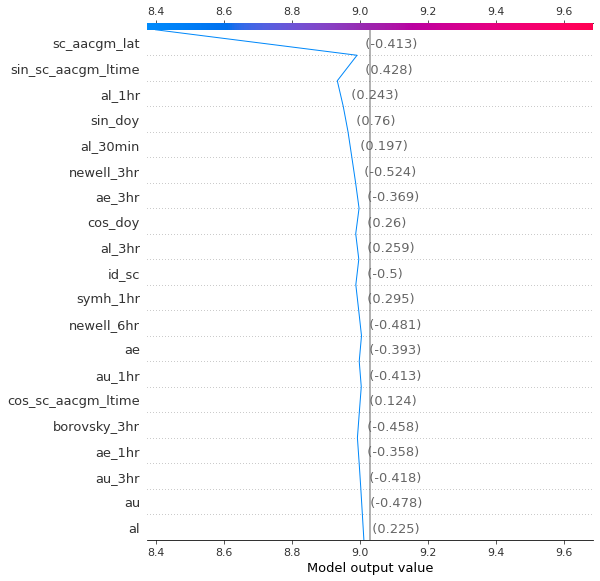

In [42]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][0], features = X_test.iloc[0,:], feature_names = X_test.columns.tolist())


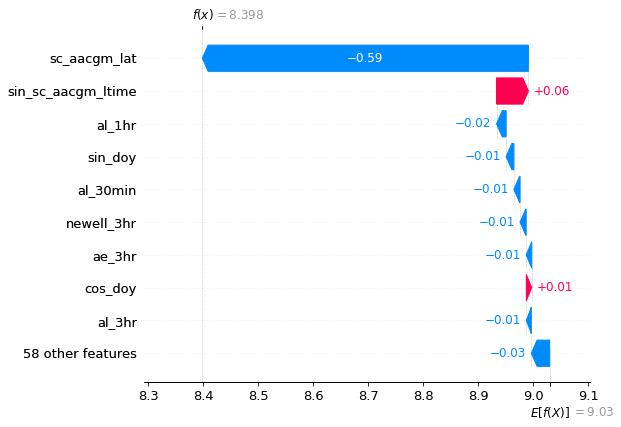

In [43]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0], feature_names = X_test.columns)
